In [22]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import pickle
from IPython.core.display import display, HTML
from tqdm.notebook import tqdm
import glob
import csv


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from matplotlib import pylab as plt
%matplotlib inline

pd.set_option("display.max_rows", 2000)
pd.set_option("display.max_colwidth", 5000)
pd.set_option("display.max_columns", 2000)


DATA_DIR = '../data/'

/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_79169/3228527578.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
glob.glob(f"{DATA_DIR}*")

['../data/NYT_Russia_Ukraine.csv',
 '../data/Ukraine_troops.csv',
 '../data/Guardians_Russia_Ukraine.csv',
 '../data/Ukraine_war.csv',
 '../data/Russia_invade.csv',
 '../data/russian_invasion_of_ukraine.csv',
 '../data/Ukraine_nato.csv',
 '../data/Russian_troops.csv',
 '../data/StandWithUkraine.csv',
 '../data/Ukraine_border.csv',
 '../data/Russian_border_Ukraine.csv']

# Load data

In [3]:
data = {}
for arg in glob.glob(f"{DATA_DIR}*"):
    print(f"Process: {arg}")
    file_name = arg.split('/')[-1].split('.')[0].lower()
    
    try:
        tmp_data = pd.read_csv(arg, encoding='utf-8', on_bad_lines='warn',
#                                skipfooter=1
#                                quoting=csv.QUOTE_MINIMAL
                              )
        
    except Exception as ex:
        print(f'ISSUE: {file_name}, {ex.args}')
        tmp_data = pd.read_csv(arg, encoding='utf-8', on_bad_lines='warn',
                               skipfooter=1
#                                quoting=csv.QUOTE_MINIMAL
                              )
    
    print(f"Load: {tmp_data.shape}")
    display(HTML(tmp_data.head(2).to_html()))
    data[file_name] = tmp_data

Process: ../data/NYT_Russia_Ukraine.csv
Load: (219, 3)


,published,headlines,articles
0,2022/06/23,"For a Kyiv Techno Collective, ‘Now Everything Is About Politics’","When Slava Lepsheiev founded the Ukrainian techno collective Cxema in 2014, “I thought it should be outside politics and just a place where people can be happy and dance,” the D.J., 40, said in a recent video interview from Kyiv.\n\nUntil the pandemic, the biannual Cxema (pronounced “skhema”) raves were essential dates in the techno calendar of Ukraine, which has become an increasingly trendy destination for club tourists over the past decade. These parties — in factories, skate parks and even an abandoned Soviet restaurant — united thousands on the dance floor to a soundtrack of experimental electronic music.\n\nBut as the Cxema platform grew bigger, and Ukraine’s political climate grew more tense, “I realized I had a responsibility to use that influence,” Lepsheiev said, and to look beyond escapism on the dance floor. Russia’s invasion of Ukraine in February deepened that commitment, and the war has transformed how Lepsheiev and his team think about their priorities and work."
1,2022/06/21,"After a Pivotal Period in Ukraine, U.S. Officials Predict the War’s Path","Several military analysts say Russia is at peak combat effectiveness in the east, as long-range artillery systems promised to Ukraine from NATO countries are still trickling in. Ukraine is hugely outgunned, they say, a stark fact that President Volodymyr Zelensky acknowledged last week.\n\n“The price of this battle for us is very high,” he said in a nightly address. “It’s just scary. And we draw the attention of our partners on a daily basis to the fact that only a sufficient number of modern artillery for Ukraine will ensure our advantage and finally the end of Russian torture of the Ukrainian Donbas.”\n\nPresident Biden on Wednesday announced an additional $1 billion in weapons and aid for Ukraine, in a package that includes more long-range artillery, anti-ship missile launchers, and rounds for howitzers and for the new American rocket system. Overall, the United States has committed about $5.6 billion in security assistance to Ukraine since Russia invaded on Feb. 24.\n\nMr. Zelensky and his aides have appealed to the West to supply more of the sophisticated armaments it has already sent. They have questioned their allies’ commitment to the Ukrainian cause and insisted that nothing else can stop Russia’s advance, which even by conservative estimates has claimed the lives of tens of thousands of civilians and soldiers."


Process: ../data/Ukraine_troops.csv
ISSUE: ukraine_troops, ('Error tokenizing data. C error: EOF inside string starting at row 154673',)


/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_40218/1727033202.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  tmp_data = pd.read_csv(arg, encoding='utf-8', on_bad_lines='warn',
Skipping line 154674: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).


Load: (154671, 29)


,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh
0,snscrape.modules.twitter.Tweet,https://twitter.com/llovetree7megu/status/1500259762709352448,2022-03-05 23:59:35+00:00,Hugs to all\nHope this is spread to Russian and Ukraine troops\n\n #Ukraine\n #NoWar\n #Stop_the_War\n #We_are_all_friends\n #Wake_up_troops\n #Hugs_to_all\n\nhttps://t.co/XFahrOAQnO,Hugs to all\nHope this is spread to Russian and Ukraine troops\n\n #Ukraine\n #NoWar\n #Stop_the_War\n #We_are_all_friends\n #Wake_up_troops\n #Hugs_to_all\n\nfirstpost.com/world/locals-i…,1500259762709352448,"{'_type': 'snscrape.modules.twitter.User', 'username': 'llovetree7megu', 'id': 712211247526051840, 'displayname': 'coolmegu', 'description': '', 'rawDescription': '', 'descriptionUrls': None, 'verified': False, 'created': '2016-03-22T09:36:08+00:00', 'followersCount': 8, 'friendsCount': 63, 'statusesCount': 226, 'favouritesCount': 313, 'listedCount': 0, 'mediaCount': 44, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/712272986275848192/qjJD9DyI_normal.jpg', 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/llovetree7megu'}",0,0,0,0,1500259762709352448,en,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",http://twitter.com/download/android,Twitter for Android,['https://www.firstpost.com/world/locals-in-ukraine-give-food-to-russian-soldier-help-him-video-call-his-mother-watch-video-here-10429641.html'],['https://t.co/XFahrOAQnO'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Ukraine', 'NoWar', 'Stop_the_War', 'We_are_all_friends', 'Wake_up_troops', 'Hugs_to_all']",NaN,Ukraine troops
1,snscrape.modules.twitter.Tweet,https://twitter.com/Delta_Molfar/status/1500259588754530306,2022-03-05 23:58:54+00:00,"@Dak_is_Good @OldNewDad @KyivIndependent Ukraine Officials, bellingcat, pentagon statements. Partly every russian air force loss is photo-captured. Which can't be made for tanks or troops for obvious reasons.","@Dak_is_Good @OldNewDad @KyivIndependent Ukraine Officials, bellingcat, pentagon statements. Partly every russian air force loss is photo-captured. Which can't be made for tanks or troops for obvious reasons.",1500259588754530306,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Delta_Molfar', 'id': 743089317980045312, 'displayname': 'Delta', 'description': '', 'rawDescription': '', 'descriptionUrls': None, 'verified': False, 'created': '2016-06-15T14:34:34+00:00', 'followersCount': 2, 'friendsCount': 67, 'statusesCount': 48, 'favouritesCount': 1210, 'listedCount': 0, 'mediaCount': 0, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1159483167859970048/NEXrWolG_normal.jpg', 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/Delta_Molfar'}",0,0,5,0,1500237451608080394,en,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",http://twitter.com/download/android,Twitter for Android,NaN,NaN,NaN,NaN,NaN,1.500244e+18,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Dak_is_Good', 'id': 21465281, 'displayname': 'Weez', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/Dak_is_Good'}","[{'_type': 'snscrape.modules.twitter.User', 'username': 'Dak_is_Good', 'id': 21465281, 'displayname': 'Weez', 'description': None, 'rawDescrip

Process: ../data/Guardians_Russia_Ukraine.csv
Load: (188, 3)


Process: ../data/Ukraine_war.csv
ISSUE: ukraine_war, ('Error tokenizing data. C error: EOF inside string starting at row 138668',)


/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_40218/1727033202.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  tmp_data = pd.read_csv(arg, encoding='utf-8', on_bad_lines='warn',
Skipping line 138669: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).


Load: (138666, 29)


,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh
0,snscrape.modules.twitter.Tweet,https://twitter.com/ksenijapavlovic/status/1500259859937337349,2022-03-05 23:59:58+00:00,"There was an anti war protest for #Ukraine as well but it’s not getting any headlines. \n\nSerbia has a good relationship with both Ukraine and Russia, both counties have supported Serbian territorial integrity over Kosovo. \n\nStop pitting Orthodox Christians against each other. https://t.co/CTulO2hTsA https://t.co/3EpcGaW6Oo","There was an anti war protest for #Ukraine as well but it’s not getting any headlines. \n\nSerbia has a good relationship with both Ukraine and Russia, both counties have supported Serbian territorial integrity over Kosovo. \n\nStop pitting Orthodox Christians against each other. twitter.com/Reuters/status… https://t.co/3EpcGaW6Oo",1500259859937337349,"{'_type': 'snscrape.modules.twitter.User', 'username': 'ksenijapavlovic', 'id': 37529641, 'displayname': 'Ksenija Pavlovic McAteer', 'description': 'Journalism Can Never Be Silenced I White House Correspondent | Publisher of the US Independent press ThePavlovicToday.com - Newspack member | @yale | LSE', 'rawDescription': 'Journalism Can Never Be Silenced I White House Correspondent | Publisher of the US Independent press https://t.co/bvuhPtQc4u - Newspack member | @yale | LSE', 'descriptionUrls': [{'text': 'ThePavlovicToday.com', 'url': 'http://ThePavlovicToday.com', 'tcourl': 'https://t.co/bvuhPtQc4u', 'indices': [101, 124]}], 'verified': True, 'created': '2009-05-03T23:17:19+00:00', 'followersCount': 12536, 'friendsCount': 1485, 'statusesCount': 2502, 'favouritesCount': 11917, 'listedCount': 238, 'mediaCount': 220, 'location': 'Washington, DC', 'protected': False, 'linkUrl': 'http://www.thepavlovictoday.com', 'linkTcourl': 'https://t.co/PQYKKraiMl', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1224810746292375552/vj5IJ-AD_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/37529641/1586634816', 'label': None, 'url': 'https://twitter.com/ksenijapavlovic'}",2,4,25,0,1500259859937337349,en,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",http://twitter.com/download/iphone,Twitter for iPhone,['https://twitter.com/Reuters/status/1500130262298120202'],['https://t.co/CTulO2hTsA'],"[{'_type': 'snscrape.modules.twitter.Photo', 'previewUrl': 'https://pbs.twimg.com/media/FNH-Y_dWQAEmz62?format=jpg&name=small', 'fullUrl': 'https://pbs.twimg.com/media/FNH-Y_dWQAEmz62?format=jpg&name=large'}, {'_type': 'snscrape.modules.twitter.Photo', 'previewUrl': 'https://pbs.twimg.com/media/FNH-Y_eWUAADmvo?format=jpg&name=small', 'fullUrl': 'https://pbs.twimg.com/media/FNH-Y_eWUAADmvo?format=jpg&name=large'}]",NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'url': 'https://twitter.com/Reuters/status/1500130262298120202', 'date': '2022-03-05T15:25:00+00:00', 'content': 'Thousands of Serbs waving Russian flags and carrying pictures of President Vladimir Putin marched through Belgrade to the Russian embassy in a rare show of public support for Moscow after its invasion of Ukraine https://t.co/xBSxzelwX5 https://t.co/wEyaZIqPH6', 'renderedContent': 'Thousands of Serbs waving Russian flags and carrying pictures of President Vladimir Putin marched through Belgrade to the Russian embassy in a rare show of public support for Moscow after its invasion of Ukraine reut.rs/3hIdRsY https://t.co/wEyaZIqPH6', 'id': 1500130262298120202, 'user': {'_type': 'snscrape.modules.twitter.User', 'username': 'Reuters', 'id': 1652541, 'displayname': 'Reuters', 'description': 'Top and breaking news, pictures and videos from Reuters. For more breaking business news, follow @ReutersBiz.', 'rawDescription': 'Top and breaking news, picture

Process: ../data/Russia_invade.csv
ISSUE: russia_invade, ('Error tokenizing data. C error: EOF inside string starting at row 145848',)


/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_40218/1727033202.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  tmp_data = pd.read_csv(arg, encoding='utf-8', on_bad_lines='warn',
Skipping line 145849: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).


Load: (145846, 29)


,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh
0,snscrape.modules.twitter.Tweet,https://twitter.com/pat_ianni/status/1500259827154505728,2022-03-05 23:59:50+00:00,JOE BIDEN SAYS HOW DO WE GET TO A PLACE WHERE PUTIN DECIDES TO INVADE RUSSIA 🤣🤣🤣😭😭😂😂\nPEOPLE VOTED FOR THIS GUY 🤣🤣🤣 https://t.co/FOHozS7vYI,JOE BIDEN SAYS HOW DO WE GET TO A PLACE WHERE PUTIN DECIDES TO INVADE RUSSIA 🤣🤣🤣😭😭😂😂\nPEOPLE VOTED FOR THIS GUY 🤣🤣🤣 https://t.co/FOHozS7vYI,1500259827154505728,"{'_type': 'snscrape.modules.twitter.User', 'username': 'pat_ianni', 'id': 1419111323707711489, 'displayname': 'Conspiracy_Realist84', 'description': ""🇦🇺🇮🇹Have a bad sense of humor,I'm a truth seeker.\nwill not stand for government tyranny."", 'rawDescription': ""🇦🇺🇮🇹Have a bad sense of humor,I'm a truth seeker.\nwill not stand for government tyranny."", 'descriptionUrls': None, 'verified': False, 'created': '2021-07-25T01:45:03+00:00', 'followersCount': 2941, 'friendsCount': 2018, 'statusesCount': 4649, 'favouritesCount': 8813, 'listedCount': 0, 'mediaCount': 983, 'location': 'Melbourne, Victoria', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1475645927691980800/HG1Kd42Z_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1419111323707711489/1627177899', 'label': None, 'url': 'https://twitter.com/pat_ianni'}",14,26,99,4,1500259827154505728,en,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",http://twitter.com/download/android,Twitter for Android,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.Video', 'thumbnailUrl': 'https://pbs.twimg.com/ext_tw_video_thumb/1500259802890452992/pu/img/PnWcagR-kFJkyMSI.jpg', 'variants': [{'_type': 'snscrape.modules.twitter.VideoVariant', 'contentType': 'video/mp4', 'url': 'https://video.twimg.com/ext_tw_video/1500259802890452992/pu/vid/1280x702/V6hyKQgfX0SYakOo.mp4?tag=12', 'bitrate': 2176000}, {'_type': 'snscrape.modules.twitter.VideoVariant', 'contentType': 'application/x-mpegURL', 'url': 'https://video.twimg.com/ext_tw_video/1500259802890452992/pu/pl/mdDqP16Jy0hGMxCG.m3u8?tag=12&container=fmp4', 'bitrate': None}, {'_type': 'snscrape.modules.twitter.VideoVariant', 'contentType': 'video/mp4', 'url': 'https://video.twimg.com/ext_tw_video/1500259802890452992/pu/vid/492x270/I1fjVfM4EayLz5_T.mp4?tag=12', 'bitrate': 256000}, {'_type': 'snscrape.modules.twitter.VideoVariant', 'contentType': 'video/mp4', 'url': 'https://video.twimg.com/ext_tw_video/1500259802890452992/pu/vid/656x360/nIdMCUIGx6_is8lY.mp4?tag=12', 'bitrate': 832000}], 'duration': 17.974, 'views': 1544}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russia invade
1,snscrape.modules.twitter.Tweet,https://twitter.com/luxeprogressive/status/1500259636863246336,2022-03-05 23:59:05+00:00,@ProfPaulPoast He doesn’t have to like it but it’s up to those countries who are sovereign and now have a proven valid concern that he would invade again. Talk about “legitimate security concerns.” The only legitimate security concerns in this equation are from Ukraine/Russia’s neighbors.,@ProfPaulPoast He doesn’t have to like it but it’s up to those countries who are sovereign and now have a proven valid concern that he would invade again. Talk about “legitimate security concerns.” The only legitimate security concerns in this equation are from Ukraine/Russia’s neighbors.,1500259636863246336,"{'_type': 'snscrape.modules.twitter.User', 'username': 'luxeprogressive', 'id': 899039004787712001, 'displayname': 'Sparkle Fairy ✨🇺🇦', 'description': '💖 | luxe lady | social democrat | progressive | libra ⚖', 'rawDescription': '💖 | luxe lady | social democrat | progressive | libra ⚖', 'descriptionUrls': None, 'verified': False, 'created': '2017-08-19T22:42:56+00:

Process: ../data/russian_invasion_of_ukraine.csv
Load: (253494, 8)


/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_40218/1727033202.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_data = pd.read_csv(arg, encoding='utf-8', on_bad_lines='warn',


,title,score,id,url,comms_num,created,body,timestamp
0,Live updates: Russians destroy Chernobyl laboratory,56,tkjwjl,https://www.washingtonpost.com/politics/live-updates-zelenskyy-to-address-japanese-parliament/2022/03/22/9a5ac75a-a9a1-11ec-8a8e-9c6e9fc7a0de_story.html,15.0,1.648003e+09,NaN,2022-03-23 02:34:15
1,Romania Is Handing Out 30 Million Anti-Radiation Pills Because of Russia,265,tkjqga,https://www.vice.com/amp/en/article/pkpw7b/iodine-pills-radiation-romania-russia,22.0,1.648002e+09,NaN,2022-03-23 02:25:07


Process: ../data/Ukraine_nato.csv
ISSUE: ukraine_nato, ('Error tokenizing data. C error: EOF inside string starting at row 122516',)


/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_40218/1727033202.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  tmp_data = pd.read_csv(arg, encoding='utf-8', on_bad_lines='warn',
Skipping line 122517: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).


Load: (122514, 29)


,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh
0,snscrape.modules.twitter.Tweet,https://twitter.com/2_4_5T_2_4_D/status/1500259863447887872,2022-03-05 23:59:59+00:00,"@ronanmcmanus @carolecadwalla @estellecostanza This rhetoric isn’t helpful “\nUKRAINE FOREIGN MINISTER SAYS IF NATO DOES NOT ESTABLISH NO FLY ZONE, IT IS BECAUSE IT IS NOT STRONG ENOUGH”","@ronanmcmanus @carolecadwalla @estellecostanza This rhetoric isn’t helpful “\nUKRAINE FOREIGN MINISTER SAYS IF NATO DOES NOT ESTABLISH NO FLY ZONE, IT IS BECAUSE IT IS NOT STRONG ENOUGH”",1500259863447887872,"{'_type': 'snscrape.modules.twitter.User', 'username': '2_4_5T_2_4_D', 'id': 996835846413279234, 'displayname': 'agentorange 🍊 🇵🇱', 'description': 'PhD scientist- ex Pharma. Here as as defoliant for twitter bullshit. Music is my only constant. nothing I post should be taken seriously or advice, except food', 'rawDescription': 'PhD scientist- ex Pharma. Here as as defoliant for twitter bullshit. Music is my only constant. nothing I post should be taken seriously or advice, except food', 'descriptionUrls': None, 'verified': False, 'created': '2018-05-16T19:32:40+00:00', 'followersCount': 599, 'friendsCount': 1063, 'statusesCount': 29074, 'favouritesCount': 84789, 'listedCount': 9, 'mediaCount': 5883, 'location': 'Inside my head', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1251293644063158273/MW6cX8Yk_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/996835846413279234/1526501904', 'label': None, 'url': 'https://twitter.com/2_4_5T_2_4_D'}",1,0,0,0,1500238235552911362,en,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,1.500258e+18,"{'_type': 'snscrape.modules.twitter.User', 'username': 'ronanmcmanus', 'id': 145575555, 'displayname': 'ronan', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/ronanmcmanus'}","[{'_type': 'snscrape.modules.twitter.User', 'username': 'ronanmcmanus', 'id': 145575555, 'displayname': 'ronan', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/ronanmcmanus'}, {'_type': 'snscrape.modules.twitter.User', 'username': 'carolecadwalla', 'id': 722242009, 'displayname': 'Carole Cadwalladr', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/carolecadwalla'}, {'_type': 'snscrape.modules.twitter.User', 'username': 'estellecostanza', 'id': 601172661, 'displayname': 'John Niven HQ', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None

Process: ../data/Russian_troops.csv
Load: (128405, 29)


,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh
0,snscrape.modules.twitter.Tweet,https://twitter.com/caolieqiao/status/1500259814244589568,2022-03-05 23:59:47+00:00,"@RadioFreeTom So if Putin have Russian troops try to stop the transfer of arms, what will NATO do?","@RadioFreeTom So if Putin have Russian troops try to stop the transfer of arms, what will NATO do?",1500259814244589568,"{'_type': 'snscrape.modules.twitter.User', 'username': 'caolieqiao', 'id': 15779775, 'displayname': 'CaoCao', 'description': '', 'rawDescription': '', 'descriptionUrls': None, 'verified': False, 'created': '2008-08-08T16:34:50+00:00', 'followersCount': 32, 'friendsCount': 57, 'statusesCount': 3180, 'favouritesCount': 142, 'listedCount': 3, 'mediaCount': 13, 'location': 'Stuttgart, Germany', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1315973318562983937/uY2GJTkg_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/15779775/1487700066', 'label': None, 'url': 'https://twitter.com/caolieqiao'}",0,0,0,0,1500237691115474950,en,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,1.500238e+18,"{'_type': 'snscrape.modules.twitter.User', 'username': 'RadioFreeTom', 'id': 459872442, 'displayname': 'Tom Nichols', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/RadioFreeTom'}","[{'_type': 'snscrape.modules.twitter.User', 'username': 'RadioFreeTom', 'id': 459872442, 'displayname': 'Tom Nichols', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/RadioFreeTom'}]",NaN,NaN,NaN,NaN,Russian troops
1,snscrape.modules.twitter.Tweet,https://twitter.com/LegioVia/status/1500259812432842752,2022-03-05 23:59:47+00:00,@Ash_Stewart_ @Lenny89128 Tragic to see this. Civilians being targeted by Russian troops. Murdering and plundering sadists. Regards. Via,@Ash_Stewart_ @Lenny89128 Tragic to see this. Civilians being targeted by Russian troops. Murdering and plundering sadists. Regards. Via,1500259812432842752,"{'_type': 'snscrape.modules.twitter.User', 'username': 'LegioVia', 'id': 1373038518155407362, 'displayname': 'via legio', 'description': 'Author /historical fiction in 1-2CE.\nThe Dacian Enigma /The Arc of Dacicus/The Aelian Crescent.⭐️⭐️⭐️⭐️Amazon/Smashwords/Goodreads.', 'rawDescription': 'Author /historical fiction in 1-2CE.\nThe Dacian Enigma /The Arc of Dacicus/The Aelian Crescent.⭐️⭐️⭐️⭐️Amazon/Smashwords/Goodreads.', 'descriptionUrls': None, 'verified': False, 'created': '2021-03-19T22:28:16+00:00', 'followersCount': 3636, 'friendsCount': 3094, 'statusesCount': 10082, 'favouritesCount': 3405, 'listedCount': 10, 'mediaCount': 556, 'location': 'Dunedin,New Zealand ', 'protected': False, 'linkUrl': 'http://www.vialegio.com', 'linkTcourl': 'https://t.co/FHptBblfnz', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1373042369935728642/8dIEh93y_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/137303851815540

Process: ../data/StandWithUkraine.csv
ISSUE: standwithukraine, ('Error tokenizing data. C error: EOF inside string starting at row 140617',)


/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_40218/1727033202.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  tmp_data = pd.read_csv(arg, encoding='utf-8', on_bad_lines='warn',
Skipping line 140618: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).


Load: (140615, 29)


,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh
0,snscrape.modules.twitter.Tweet,https://twitter.com/seriouschris90/status/1500259829587263490,2022-03-05 23:59:51+00:00,@RitchieTorres Please get it done!! Arm Ukraine to the teeth! They are being killed senselessly! #StandwithUkraine,@RitchieTorres Please get it done!! Arm Ukraine to the teeth! They are being killed senselessly! #StandwithUkraine,1500259829587263490,"{'_type': 'snscrape.modules.twitter.User', 'username': 'seriouschris90', 'id': 1242631919231283202, 'displayname': '🇺🇸🇺🇸Christopher L 🇺🇦🇺🇦', 'description': 'Always seeking knowledge and happiness.', 'rawDescription': 'Always seeking knowledge and happiness.', 'descriptionUrls': None, 'verified': False, 'created': '2020-03-25T02:00:43+00:00', 'followersCount': 4, 'friendsCount': 32, 'statusesCount': 555, 'favouritesCount': 359, 'listedCount': 0, 'mediaCount': 12, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1242632756674297856/EG8EMPWI_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1242631919231283202/1587174972', 'label': None, 'url': 'https://twitter.com/seriouschris90'}",0,0,0,0,1500218018168668160,en,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,1.500221e+18,"{'_type': 'snscrape.modules.twitter.User', 'username': 'RitchieTorres', 'id': 1247612029, 'displayname': 'Ritchie Torres', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/RitchieTorres'}","[{'_type': 'snscrape.modules.twitter.User', 'username': 'RitchieTorres', 'id': 1247612029, 'displayname': 'Ritchie Torres', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/RitchieTorres'}]",NaN,NaN,['StandwithUkraine'],NaN,StandWithUkraine
1,snscrape.modules.twitter.Tweet,https://twitter.com/dyingBreath/status/1500259821999857665,2022-03-05 23:59:49+00:00,"Maybe it's the end but it never is, stay strong… #StandWithUkraine #PrayingForUkraine https://t.co/ahGLwjeKZE","Maybe it's the end but it never is, stay strong… #StandWithUkraine #PrayingForUkraine https://t.co/ahGLwjeKZE",1500259821999857665,"{'_type': 'snscrape.modules.twitter.User', 'username': 'dyingBreath', 'id': 21406896, 'displayname': 'Alexander Perez†', 'description': ""Pαnαmαniαn, Professor & Grαphic Designer \uf8ff; living in #Pαnαmα for now; life is a journey and it won't end until you decide; #CostαRicα in my heαrt."", 'rawDescription': ""Pαnαmαniαn, Professor & Grαphic Designer \uf8ff; living in #Pαnαmα for now; life is a journey and it won't end until you decide; #CostαRicα in my heαrt."", 'descriptionUrls': None, 'verified': False, 'created': '2009-02-20T15:50:11+00:00', 'followersCount': 104, 'friendsCount': 216, 'statusesCount': 28582, 'favouritesCount': 7492, 'listedCount': 7, 'mediaCount': 5689, 'location': 'Panamá', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/14927027567

Process: ../data/Ukraine_border.csv
ISSUE: ukraine_border, ('Error tokenizing data. C error: EOF inside string starting at row 143829',)


/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_40218/1727033202.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  tmp_data = pd.read_csv(arg, encoding='utf-8', on_bad_lines='warn',
Skipping line 143830: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).


Load: (143827, 29)


,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh
0,snscrape.modules.twitter.Tweet,https://twitter.com/i4deola/status/1500259810385838083,2022-03-05 23:59:46+00:00,"@Younes_Messili Israel-Palestine issue is a bit more complex, it is about border dispute, Russia into Ukraine is an invasion. They have been attempts to condemn Israel but it is always blocked by the US\nThere is nothing stopping any country from sanctioning Israel, like Iran does","@Younes_Messili Israel-Palestine issue is a bit more complex, it is about border dispute, Russia into Ukraine is an invasion. They have been attempts to condemn Israel but it is always blocked by the US\nThere is nothing stopping any country from sanctioning Israel, like Iran does",1500259810385838083,"{'_type': 'snscrape.modules.twitter.User', 'username': 'i4deola', 'id': 1139397666654191621, 'displayname': 'deola', 'description': 'a bit of everything', 'rawDescription': 'a bit of everything', 'descriptionUrls': None, 'verified': False, 'created': '2019-06-14T05:02:27+00:00', 'followersCount': 57, 'friendsCount': 250, 'statusesCount': 2774, 'favouritesCount': 1087, 'listedCount': 0, 'mediaCount': 11, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1386138128273055751/WEMErTHj_normal.jpg', 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/i4deola'}",1,0,0,0,1500178754748006402,en,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",https://mobile.twitter.com,Twitter Web App,NaN,NaN,NaN,NaN,NaN,1.500179e+18,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Younes_Messili', 'id': 1976418457, 'displayname': 'Younes Messili', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/Younes_Messili'}","[{'_type': 'snscrape.modules.twitter.User', 'username': 'Younes_Messili', 'id': 1976418457, 'displayname': 'Younes Messili', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/Younes_Messili'}]",NaN,NaN,NaN,NaN,Ukraine border
1,snscrape.modules.twitter.Tweet,https://twitter.com/donveach/status/1500259722112520194,2022-03-05 23:59:25+00:00,"Is that the same expensive and ineffective border wall that smugglers have breached over 3000 times in the past couple years? And yet the gasbag, azzhat Rosedale withholds aid to Ukraine. Russian enabler. https://t.co/UwbGIPgiYd","Is that the same expensive and ineffective border wall that smugglers have breached over 3000 times in the past couple years? And yet the gasbag, azzhat Rosedale withholds aid to Ukraine. Russian enabler. twitter.com/ronfilipkowski…",1500259722112520194,"{'_type': 'snscrape.modules.twitter.User', 'username': 'donveach', 'id': 2864827297, 'displayname': 'Don Veach', 'description': 'Proud New Orleanian. Tulane grad. Vote out anyone who praises or supports the Russian invasion of Ukraine #BidenHarris', 'rawDescription': 'Proud New Orleanian. Tulane grad. Vote out anyone who praises or supports the Russian invasion of Ukraine #BidenHarris', 'descriptionUrls': None, 'verified': False

Process: ../data/Russian_border_Ukraine.csv
Load: (53040, 29)


,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh
0,snscrape.modules.twitter.Tweet,https://twitter.com/donveach/status/1500259722112520194,2022-03-05 23:59:25+00:00,"Is that the same expensive and ineffective border wall that smugglers have breached over 3000 times in the past couple years? And yet the gasbag, azzhat Rosedale withholds aid to Ukraine. Russian enabler. https://t.co/UwbGIPgiYd","Is that the same expensive and ineffective border wall that smugglers have breached over 3000 times in the past couple years? And yet the gasbag, azzhat Rosedale withholds aid to Ukraine. Russian enabler. twitter.com/ronfilipkowski…",1500259722112520194,"{'_type': 'snscrape.modules.twitter.User', 'username': 'donveach', 'id': 2864827297, 'displayname': 'Don Veach', 'description': 'Proud New Orleanian. Tulane grad. Vote out anyone who praises or supports the Russian invasion of Ukraine #BidenHarris', 'rawDescription': 'Proud New Orleanian. Tulane grad. Vote out anyone who praises or supports the Russian invasion of Ukraine #BidenHarris', 'descriptionUrls': None, 'verified': False, 'created': '2014-10-19T11:37:54+00:00', 'followersCount': 1972, 'friendsCount': 1967, 'statusesCount': 1776, 'favouritesCount': 1459, 'listedCount': 0, 'mediaCount': 127, 'location': 'New Orleans, LA', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1287190374671364098/TCSvJovW_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/2864827297/1613400061', 'label': None, 'url': 'https://twitter.com/donveach'}",0,0,1,0,1500259722112520194,en,"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>",http://twitter.com/#!/download/ipad,Twitter for iPad,['https://twitter.com/ronfilipkowski/status/1500214970302271494'],['https://t.co/UwbGIPgiYd'],NaN,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'url': 'https://twitter.com/RonFilipkowski/status/1500214970302271494', 'date': '2022-03-05T21:01:36+00:00', 'content': 'Paul Gosar, Thomas Massie and Matt Rosendale were the only Reps to vote against aid for Ukraine. Rosedale says he won’t agree to help Ukraine until Biden finishes the border wall. https://t.co/zw7x7vnrD9', 'renderedContent': 'Paul Gosar, Thomas Massie and Matt Rosendale were the only Reps to vote against aid for Ukraine. Rosedale says he won’t agree to help Ukraine until Biden finishes the border wall. https://t.co/zw7x7vnrD9', 'id': 1500214970302271494, 'user': {'_type': 'snscrape.modules.twitter.User', 'username': 'RonFilipkowski', 'id': 1298372735383605249, 'displayname': 'Ron Filipkowski', 'description': 'Attorney, Marine, Triathlete, Historian. Fmr Fed Prosecutor & Repub; now Defense Att & Democrat. Track and Report on the Right-Wing. Seen on BBC, CNN, MSNBC.', 'rawDescription': 'Attorney, Marine, Triathlete, Historian. Fmr Fed Prosecutor & Repub; now Defense Att & Democrat. Track and Report on the Right-Wing. Seen on BBC, CNN, MSNBC.', 'descriptionUrls': None, 'verified': False, 'created': '2020-08-25T21:32:51+00:00', 'followersCount': 296881, 'friendsCount': 1150, 'statusesCount': 33822, 'favouritesCount': 50023, 'listedCount': 1544, 'mediaCount': 6542, 'location': 'Florida', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1416869035996758020/R0cKz3Gc_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1298372735383605249/1627596282', 'label': None, 'url': 'https://twitter.com/RonFilipkowski'}, 'replyCount': 2306, 'retweetCount': 1988, 'likeCount': 4874, 'quoteCount': 685, 'conversationId': 1500214970302271494, 'lang': 'en', 'source': '<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>', 

In [4]:
for arg, value in data.items():
    print(arg)
    print(value.columns)
    print(value.shape)

nyt_russia_ukraine
Index(['published', 'headlines', 'articles'], dtype='object')
(219, 3)
ukraine_troops
Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'Searh'],
      dtype='object')
(154671, 29)
guardians_russia_ukraine
Index(['published', 'headlines', 'articles'], dtype='object')
(188, 3)
ukraine_war
Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentione

In [5]:
data.keys()

dict_keys(['nyt_russia_ukraine', 'ukraine_troops', 'guardians_russia_ukraine', 'ukraine_war', 'russia_invade', 'russian_invasion_of_ukraine', 'ukraine_nato', 'russian_troops', 'standwithukraine', 'ukraine_border', 'russian_border_ukraine'])

# Create datasets

In [23]:
import yaml
import json
import ast
from tqdm import tqdm

def load_json(string):
    try:
#         print(f"input: {string}")
        return ast.literal_eval(string)
    except Exception as ex:
        print(f"WRONG: {string}, {ex.args}")
    
    return None
    
tqdm.pandas()

In [18]:
data['nyt_russia_ukraine']['source'] = 'nyt'
data['guardians_russia_ukraine']['source'] = 'guardians'

In [33]:
data_real = pd.concat([data['nyt_russia_ukraine'],
                      data['guardians_russia_ukraine']],
                     axis=0, sort=False)
data_real['published'] = pd.to_datetime(data_real['published'])
data_real.shape

data_tweet = pd.concat([data['ukraine_troops'],
                      data['ukraine_war'],
                      data['russia_invade'],
                      data['ukraine_nato'],
                      data['russian_troops'],
                      data['standwithukraine'],
                      data['ukraine_border'],
                      data['russian_border_ukraine']],
                     axis=0, sort=False).drop(['_type', 'source', 'sourceUrl',
                                              'cashtags'], axis=1)
# parce dates and jsons in columns
data_tweet['date'] = pd.to_datetime(data_tweet['date'])
data_tweet['user'] = data_tweet['user'].progress_apply(load_json)
data_tweet['username'] = data_tweet['user'].apply(lambda x: x['username'])

data_tweet['inReplyToUser'] = data_tweet['inReplyToUser'].fillna('{}').progress_apply(load_json)
data_tweet['mentionedUsers'] = data_tweet['mentionedUsers'].fillna('{}').progress_apply(load_json)
data_tweet['quotedTweet'] = data_tweet['quotedTweet'].fillna('{}').progress_apply(load_json)

data_score = data['russian_invasion_of_ukraine'].copy()
data_score['timestamp'] = pd.to_datetime(data_score['timestamp'])
data_score.shape

(407, 4)

100%|████████████████████████████████████████████████| 1027584/1027584 [00:21<00:00, 47155.83it/s]


(253494, 8)

## Processing twitter data

- _type drop based on 
- source
- sourceUrl
- cashtags
- url
- date
- content
- renderedContent
- id
- user
- replyCount
- retweetCount
- likeCount
- quoteCount
- conversationId
- lang
- sourceLabel
- outlinks
- tcooutlinks
- media
- retweetedTweet
- quotedTweet
- inReplyToTweetId
- inReplyToUser
- mentionedUsers
- coordinates
- place
- hashtags
- Searh
- username
- pid

In [47]:
# drop duplicates
data_tweet_clean = data_tweet.drop_duplicates(subset=['id'])

data_tweet_clean.drop(['user', 'inReplyToUser', 'mentionedUsers', 'quotedTweet'], axis=1).nunique()
data_tweet_clean.shape

url                 873019
date                622340
content             864252
renderedContent     842692
id                  873019
replyCount             653
retweetCount          1336
likeCount             2804
quoteCount             404
conversationId      659159
lang                    60
sourceLabel           2050
outlinks            188551
tcooutlinks         271118
media               102531
retweetedTweet           0
inReplyToTweetId    314144
coordinates           3703
place                 3545
hashtags            102529
Searh                    8
username            402380
dtype: int64

(873019, 26)

In [48]:
# drop unuser info
data_tweet_clean = data_tweet_clean.query("lang == 'en'")#.drop(['conversationId',
                                        #'tcooutlinks', 'coordinates', 'place', 'lang'], axis=1)

In [49]:
data_tweet_clean.head(2)

,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,Searh,username
0,https://twitter.com/llovetree7megu/status/1500259762709352448,2022-03-05 23:59:35+00:00,Hugs to all\nHope this is spread to Russian and Ukraine troops\n\n #Ukraine\n #NoWar\n #Stop_the_War\n #We_are_all_friends\n #Wake_up_troops\n #Hugs_to_all\n\nhttps://t.co/XFahrOAQnO,Hugs to all\nHope this is spread to Russian and Ukraine troops\n\n #Ukraine\n #NoWar\n #Stop_the_War\n #We_are_all_friends\n #Wake_up_troops\n #Hugs_to_all\n\nfirstpost.com/world/locals-i…,1500259762709352448,"{'_type': 'snscrape.modules.twitter.User', 'username': 'llovetree7megu', 'id': 712211247526051840, 'displayname': 'coolmegu', 'description': '', 'rawDescription': '', 'descriptionUrls': None, 'verified': False, 'created': '2016-03-22T09:36:08+00:00', 'followersCount': 8, 'friendsCount': 63, 'statusesCount': 226, 'favouritesCount': 313, 'listedCount': 0, 'mediaCount': 44, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/712272986275848192/qjJD9DyI_normal.jpg', 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/llovetree7megu'}",0,0,0,0,1500259762709352448,en,Twitter for Android,['https://www.firstpost.com/world/locals-in-ukraine-give-food-to-russian-soldier-help-him-video-call-his-mother-watch-video-here-10429641.html'],['https://t.co/XFahrOAQnO'],NaN,NaN,{},NaN,{},{},NaN,NaN,"['Ukraine', 'NoWar', 'Stop_the_War', 'We_are_all_friends', 'Wake_up_troops', 'Hugs_to_all']",Ukraine troops,llovetree7megu
1,https://twitter.com/Delta_Molfar/status/1500259588754530306,2022-03-05 23:58:54+00:00,"@Dak_is_Good @OldNewDad @KyivIndependent Ukraine Officials, bellingcat, pentagon statements. Partly every russian air force loss is photo-captured. Which can't be made for tanks or troops for obvious reasons.","@Dak_is_Good @OldNewDad @KyivIndependent Ukraine Officials, bellingcat, pentagon statements. Partly every russian air force loss is photo-captured. Which can't be made for tanks or troops for obvious reasons.",1500259588754530306,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Delta_Molfar', 'id': 743089317980045312, 'displayname': 'Delta', 'description': '', 'rawDescription': '', 'descriptionUrls': None, 'verified': False, 'created': '2016-06-15T14:34:34+00:00', 'followersCount': 2, 'friendsCount': 67, 'statusesCount': 48, 'favouritesCount': 1210, 'listedCount': 0, 'mediaCount': 0, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1159483167859970048/NEXrWolG_normal.jpg', 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/Delta_Molfar'}",0,0,5,0,1500237451608080394,en,Twitter for Android,NaN,NaN,NaN,NaN,{},1.500244e+18,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Dak_is_Good', 'id': 21465281, 'displayname': 'Weez', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/Dak_is_Good'}","[{'_type': 'snscrape.modules.twitter.User', 'username': 'Dak_is_Good', 'id': 21465281, 'displayname': 'Weez', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None,

In [50]:
# get info from jsons
data_tweet_clean['replied_user'] = data_tweet_clean['inReplyToUser'].apply(lambda x: x['username']
                                                                              if 'username' in x else None)
data_tweet_clean['quoted_user'] = data_tweet_clean['quotedTweet'].apply(lambda x: x['user']['username']
                                                                              if 'user' in x else None)
data_tweet_clean['quoted_id'] = data_tweet_clean['quotedTweet'].apply(lambda x: x['id']
                                                                              if 'id' in x else None)
data_tweet_clean['mentioned_users'] = data_tweet_clean['mentionedUsers'].apply(lambda args: [x['username']
                                                                              if 'username' in x else None 
                                                                                for x in args])

In [51]:
data_tweet_clean.drop(['user', 'inReplyToUser', 'mentionedUsers', 
                       'mentioned_users', 'quotedTweet'], axis=1).nunique()

url                 787029
date                585231
content             782193
renderedContent     765695
id                  787029
replyCount             644
retweetCount          1304
likeCount             2710
quoteCount             398
conversationId      586028
lang                     1
sourceLabel           1880
outlinks            166869
tcooutlinks         236283
media                85138
retweetedTweet           0
inReplyToTweetId    295763
coordinates           3091
place                 2971
hashtags             83017
Searh                    8
username            364264
replied_user        146362
quoted_user          21820
quoted_id            53178
dtype: int64

In [52]:
data_tweet_clean.isna().sum()

url                      0
date                     0
content                  0
renderedContent          0
id                       0
user                     0
replyCount               0
retweetCount             0
likeCount                0
quoteCount               0
conversationId           0
lang                     0
sourceLabel              0
outlinks            544077
tcooutlinks         544077
media               699383
retweetedTweet      787029
quotedTweet              0
inReplyToTweetId    414686
inReplyToUser            0
mentionedUsers           0
coordinates         776748
place               776748
hashtags            603696
Searh                    0
username                 0
replied_user        414686
quoted_user         711230
quoted_id           711230
mentioned_users          0
dtype: int64

In [53]:
data_tweet_clean.sample(5)

,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,Searh,username,replied_user,quoted_user,quoted_id,mentioned_users
124701,https://twitter.com/Kashco_co_uk/status/1488580905593675776,2022-02-01 18:31:59+00:00,"Stop talking about Russian ‘invasion’ of Ukraine, China tells UN - \nhttps://t.co/N7Jd0F8HnR -\nAccording to an official, the UN Security Council is not the place to discuss the matter\nUsing the UN Security Council to debate the standoff on the border between Russia and Ukrain...","Stop talking about Russian ‘invasion’ of Ukraine, China tells UN - \nkashco.co.uk/stop-talking-a… -\nAccording to an official, the UN Security Council is not the place to discuss the matter\nUsing the UN Security Council to debate the standoff on the border between Russia and Ukrain...",1488580905593675776,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Kashco_co_uk', 'id': 1359905368613224449, 'displayname': 'kashco.co.uk', 'description': '', 'rawDescription': '', 'descriptionUrls': None, 'verified': False, 'created': '2021-02-11T16:41:29+00:00', 'followersCount': 14, 'friendsCount': 0, 'statusesCount': 8879, 'favouritesCount': 0, 'listedCount': 0, 'mediaCount': 1926, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png', 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/Kashco_co_uk'}",0,0,0,0,1488580905593675776,en,Kashco,['https://kashco.co.uk/stop-talking-about-russian-invasion-of-ukraine-china-tells-un/24853/'],['https://t.co/N7Jd0F8HnR'],NaN,NaN,{},NaN,{},{},NaN,NaN,NaN,Ukraine border,Kashco_co_uk,None,None,NaN,[]
39632,https://twitter.com/yogindar/status/1497645449708113920,2022-02-26 18:51:14+00:00,NATO should move its all Europe troops to Poland to threaten going inside Ukraine to remove Russian soldiers from Ukraine and slow down Russian Invasion. Current NATO strategy of distributed troops in Europe and imposing sanctions incorrect. \n#UkraineWar,NATO should move its all Europe troops to Poland to threaten going inside Ukraine to remove Russian soldiers from Ukraine and slow down Russian Invasion. Current NATO strategy of distributed troops in Europe and imposing sanctions incorrect. \n#UkraineWar,1497645449708113920,"{'_type': 'snscrape.modules.twitter.User', 'username': 'yogindar', 'id': 14083417, 'displayname': 'Yogindar Das Y', 'description': 'Software Engineer.', 'rawDescription': 'Software Engineer.', 'descriptionUrls': None, 'verified': False, 'created': '2008-03-05T15:10:34+00:00', 'followersCount': 48, 'friendsCount': 69, 'statusesCount': 393, 'favouritesCount': 6, 'listedCount': 1, 'mediaCount': 6, 'location': 'Bangalore', 'protected': False, 'linkUrl': 'http://www.yogindar.com/', 'linkTcourl': 'http://t.co/94BcgPn2Vl', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/3409118613/ccf2c8f31e765eb1863d2ae66bb67a42_normal.png', 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/yogindar'}",1,0,0,0,1497645449708113920,en,Twitter Web App,NaN,NaN,NaN,NaN,{},NaN,{},{},NaN,NaN,['UkraineWar'],Ukraine troops,yogindar,None,None,NaN,[]
2131,https://twitter.com/Emf25Dec/status/1500158806831300608,2022-03-05 17:18:25+00:00,its time to buy land in russia not j&amp; k🤣😂\n#RussianRuble \ngame on \n4 player\nAmerican B-52 fly near ukraine border😂\n#Shell BUY PETROL AT CHEAP PRTE FROM RUSSIA,its time to buy land in russia not j&amp; k🤣😂\n#RussianRuble \ngame on \n4 player\nAmerican B-52 fly near ukraine border😂\n#Shell BUY PETROL AT CHEAP PRTE FROM RUSSIA,1500158806831300608,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Emf25Dec', 'id': 1293203328919195648, 'displayname': 'EMF', 'description': 'zeno.fm/trance-on-air/ zeno.fm/player/go-on-a… zeno.fm/a-state-of-tra…', '

In [54]:
data_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787029 entries, 0 to 53039
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   url               787029 non-null  object             
 1   date              787029 non-null  datetime64[ns, UTC]
 2   content           787029 non-null  object             
 3   renderedContent   787029 non-null  object             
 4   id                787029 non-null  int64              
 5   user              787029 non-null  object             
 6   replyCount        787029 non-null  int64              
 7   retweetCount      787029 non-null  int64              
 8   likeCount         787029 non-null  int64              
 9   quoteCount        787029 non-null  int64              
 10  conversationId    787029 non-null  int64              
 11  lang              787029 non-null  object             
 12  sourceLabel       787029 non-null  object    

In [35]:
data_tweet_clean.outlinks.values

array(["['https://www.firstpost.com/world/locals-in-ukraine-give-food-to-russian-soldier-help-him-video-call-his-mother-watch-video-here-10429641.html']",
       nan,
       "['https://twitter.com/Ash_Stewart_/status/1500228096544448522']",
       ...,
       "['https://ktvz.com/politics/cnn-us-politics/2021/12/30/biden-hopes-for-ukraine-de-escalation-in-call-with-putin/']",
       nan, nan], dtype=object)

### Save data

In [61]:
for arg in range(data_tweet_clean.shape[0] // 50000):
    pickle.dump(data_tweet_clean.iloc[(arg * 50000):((arg + 1) * 50000),
                                    ], open(f'data_clean_{arg}.pkl', 'wb'))

In [55]:
import pickle


pickle.dump(data_tweet_clean, open('data_clean.pkl', 'wb'))
# pickle.dump((data_real, data_tweet, data_score), open('data.pkl', 'wb'))

In [ ]:
import pickle

pickle.dump((data_real, data_tweet_clean, data_score), open('data.pkl', 'wb'))

In [ ]:
pickle.dump(data_tweet_clean[['pid', 'content', 'url']], open('data_simple.pkl', 'wb'))

## Subset selection

In [76]:
data_tweet_clean.sample(1)

,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,Searh,username,replied_user,quoted_user,quoted_id,mentioned_users
142817,https://twitter.com/PoliticalGeeker/status/1486006061437960193,2022-01-25 16:00:28+00:00,@johncarlbaker Idk do you have any particulars other than vague statements of not supporting punitive measures against Russia if they invade Ukraine?,@johncarlbaker Idk do you have any particulars other than vague statements of not supporting punitive measures against Russia if they invade Ukraine?,1486006061437960193,"{'_type': 'snscrape.modules.twitter.User', 'username': 'PoliticalGeeker', 'id': 938969258293424128, 'displayname': 'F', 'description': 'Sic semper tyrannis', 'rawDescription': 'Sic semper tyrannis', 'descriptionUrls': None, 'verified': False, 'created': '2017-12-08T03:11:31+00:00', 'followersCount': 146, 'friendsCount': 2213, 'statusesCount': 60523, 'favouritesCount': 97420, 'listedCount': 2, 'mediaCount': 4445, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1165067019340976128/9IYhKVkb_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/938969258293424128/1631344886', 'label': None, 'url': 'https://twitter.com/PoliticalGeeker'}",0,0,0,0,1485978823212601345,en,Twitter for iPhone,NaN,NaN,NaN,NaN,{},1.485979e+18,"{'_type': 'snscrape.modules.twitter.User', 'username': 'johncarlbaker', 'id': 372300949, 'displayname': 'John Carl Baker', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/johncarlbaker'}","[{'_type': 'snscrape.modules.twitter.User', 'username': 'johncarlbaker', 'id': 372300949, 'displayname': 'John Carl Baker', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/johncarlbaker'}]",NaN,NaN,NaN,Russia invade,PoliticalGeeker,johncarlbaker,None,NaN,[johncarlbaker]


In [78]:
data_tweet_clean.username.value_counts().reset_index()

,index,username
0,Fidget02,1222
1,trstdtravlr,1188
2,AndyVermaut,903
3,trustdtravelr,679
4,TheAnswerYes,593
...,...,...
364259,hidemytwittur,1
364260,goodenoughzz,1
364261,hamza_hazard7,1
364262,connorjmetz,1


## LDA

In [2]:
import pickle

data_tweet_clean = pickle.load(open('data_clean.pkl', 'rb'))
data_tweet_clean.shape

(787029, 30)

In [28]:
data_tweet_clean.sample(1)

url  \
7913  https://twitter.com/cw_palmer/status/1499751846591836161   

                          date  \
7913 2022-03-04 14:21:18+00:00   

                                                                                                                                                                                                                                                                                                                                                                                                                             content  \
7913  @BonsaiBrain @ejvandermeulen @RussianEmbassy @mfa_russia @RusEmbUSA @RusembUkraine @RussiaUN @BBCWorld @ftworldnews @REESOxford @RT_com @guardian @MailOnline So dumb. When was the last time a NATO state invaded another country to colonize? Countries willingly join NATO (Nato learn and move on )\n\nWhy?\nTo defend against countries wanting to actually invade and colonize now, aka, Russia (reverting back to 1980)   

                                                                                                                                                                                                                                                                                                                                                                                                                     renderedContent  \
7913  @BonsaiBrain @ejvandermeulen @RussianEmbassy @mfa_russia @RusEmbUSA @RusembUkraine @RussiaUN @BBCWorld @ftworldnews @REESOxford @RT_com @guardian @MailOnline So dumb. When was the last time a NATO state invaded another country to colonize? Countries willingly join NATO (Nato learn and move on )\n\nWhy?\nTo defend against countries wanting to actually invade and colonize now, aka, Russia (reverting back to 1980)   

                       id  \
7913  1499751846591836161   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   user  \
7913  {'_type': 'snscrape.modules.twitter.User', 'username': 'cw_palmer', 'id': 1499327456758669313, 'displayname': 'Charles William', 'description': '', 'rawDescription': '', 'descriptionUrls': None, 'verified': False, 'created': '2022-03-03T10:15:06+00:00', 'followersCount': 0, 'friendsCount': 9, 'statusesCount': 35, 'favouritesCount': 16, 'listedCount': 0, 'mediaCount': 0, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1499327501209853957/njr_9YcU_normal.png', 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/cw_palmer'}   

      replyCount  retweetCount  likeCount  quoteCount       conversationId  \
7913           0             0          0           0  1499735436373250049   

     lang      sourceLabel outlinks tcooutlinks media  retweetedTweet  \
7913   en  Twitter Web App      NaN         NaN   NaN             NaN   

     quotedTweet  inReplyToTweetId  \
7913          {}      1.499745e+18   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [ ]:
data_tweet_clean[data_tweet_clean.]

In [27]:
for arg in data_tweet_clean.username.value_counts().reset_index()['index']: print(arg)

Fidget02
trstdtravlr
AndyVermaut
trustdtravelr
TheAnswerYes
MarketsCafe
nigroeneveld
EuropeNews_b
SkyNetPlatform
Alexand65504397
NATOlizer
aw_journal2021
StopVladdyDaddy
Orgetorix
TheChestnutPost
PoliticalGeeker
ArvadaRadio
sawanswers
DHFabian1
SoizaDavid
ralakbar
auto_news_feed
Andy_Scollick
ZyiteGadgets
EuromaidanPR
WIONews
rich_outlaw
spriter99880
SandorDomjan1
Reuters
BanglaViral
Alexkennedy30
BistoshW
ThriftWallet
adabagcompany
MarQs__
travelerapps
GlasnostGone
Internl_Leaks
ReddySalina
NFLX1
sarang143u
tellmetimes
BerkleyBearNews
DailyMirror
NewsWorldPress
CyberRealms1
Diplomacy140
anews
dev_discourse
Knewz_Currently
SkyNews
ThomasMutschler
The5HbK
DiscoveryMosti
AbdulsatarBoch1
Freecitizen864
littlehawk463
UATV_en
NaijaNewsWire
jondknight
jeguru1
JrmChenu
IdeologyWars
CAdabag
spicoli_69
playitsafe_mr
TRTWorldNow
usasharenews
PaulaChertok
CGTNOfficial
walterlekh
PerhapsWriter
avsec_pro
TigerKnowz
Meekeelee011
srbija_eu
v_geuzen
MavkaSlavka
vicktop55
rogue_corq
NewsPlayerPlus
Apex

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
import pandas as pd
import unicodedata
import re
import contractions
import string
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
#spacy
import spacy
from nltk.corpus import stopwords
#vis
import pyLDAvis
import pyLDAvis.gensim_models

In [4]:
tweets_df = data_tweet_clean[['id', 'content']]

In [7]:
def standardize_accented_chars(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

#testing the function on a single sample for explaination
print(standardize_accented_chars('Sómě words such as résumé, café, prótest, divorcé, coördinate, exposé, latté.'))
#standardizing accented characters for every row
tweets_df.Tweets=tweets_df.content.apply(standardize_accented_chars)

Some words such as resume, cafe, protest, divorce, coordinate, expose, latte.


/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_79169/1162673712.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  tweets_df.Tweets=tweets_df.content.apply(standardize_accented_chars)


In [8]:
def get_number_of_urls(documents):
    print("{:.2f}% of documents contain urls".format(sum
            (documents.apply(lambda x:x.find('http'))>0)/len
            (documents)*100))
# Passing the 'Tweets' column of the dataframe as the argument
print(get_number_of_urls(tweets_df.content)) 

39.10% of documents contain urls
None


In [10]:
def remove_url(text):
    return re.sub(r'https?:\S*', '', text)
#testing the function on a single sample for explaination
                  
print(remove_url('using https://www.google.com/ as an example'))
#removing urls from every row
tweets_df.content=tweets_df.content.apply(remove_url)
print(get_number_of_urls(tweets_df.content)) 

using  as an example


/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_79169/1770110056.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df.content=tweets_df.content.apply(remove_url)


0.00% of documents contain urls
None


In [12]:
def expand_contractions(text):
    expanded_words = [] 
    try:
        for word in text.split():
            expanded_words.append(contractions.fix(word)) 
        return ' '.join(expanded_words)
    except Exception as ex:
        print(f"Wrong: {text}, {ex.args}")
        return None

#testing the function on a single sample for explaination
print(expand_contractions("Don't is same as do not"))
#expanding contractions for every row

tweets_df.content = tweets_df.content.apply(expand_contractions)

Do not is same as do not
Wrong: @ZelenskyyUa İ'M FROM AZERBAİJAN. We are want to StopWar and Russian troops leaves Ukraine, ('string index out of range',)
Wrong: A European war is raging in #Ukraine—and it isn’t likely to end soon. Why is the West trying to drag #Turkey into a war with #Russia?

By İbrahim Karagül @ibrahimkaragul

#USA #UK #Europe #UkraineRussiaWar #NATO #Realpolitik #geopolitics #geostrategy

, ('string index out of range',)
Wrong: Will war break out in #Ukraine, or will the West stoke a #Turkey-#Russia conflict? What sort of game is being played in the Black Sea?

By İbrahim Karagül @ibrahimkaragul

#USA #Europe #NATO #geopolitics #geostrategy

, ('string index out of range',)
Wrong: Will war break out in #Ukraine, or will the West stoke a #Turkey-#Russia conflict? What sort of game is being played in the Black Sea?

By İbrahim Karagül @ibrahimkaragul

#USA #Europe #NATO #geopolitics #geostrategy

, ('string index out of range',)
Wrong: All recent Turkey-enthusiasts 

/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_79169/642854990.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df.content=tweets_df.content.apply(expand_contractions)


In [13]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787029 entries, 0 to 53039
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       787029 non-null  int64 
 1   content  787022 non-null  object
dtypes: int64(1), object(1)
memory usage: 18.0+ MB


In [14]:
tweets_df = tweets_df.dropna().copy()

In [17]:
def remove_mentions_and_tags(text):
    text = re.sub(r'@\S*', '', text)
    return re.sub(r'#\S*', '', text)
#testing the function on a single sample for explaination
print(remove_mentions_and_tags('Some random @abc and #def'))
#removing mentions and tags from every row
tweets_df.content=tweets_df.content.apply(remove_mentions_and_tags)

Some random  and 


In [18]:
def keep_only_alphabet(text):
    return re.sub(r'[^a-z]', ' ', text)
#testing the function on a single sample for explaination
print(keep_only_alphabet('Just a bit more $$processing required.Just a bit!!!'))
#for all the rows
tweets_df.content=tweets_df.content.apply(keep_only_alphabet)

 ust a bit more   processing required  ust a bit   


In [24]:
def remove_stopwords(text,nlp,custom_stop_words=None,
remove_small_tokens=True,min_len=2):
    # if custom stop words are provided, then add them to default stop words list
    if custom_stop_words:
        nlp.Defaults.stop_words |= custom_stop_words
    
    filtered_sentence =[] 
    doc=nlp(text)
    for token in doc:
        
        if token.is_stop == False: 
            
            # if small tokens have to be removed, then select only those which are longer than the min_len 
            if remove_small_tokens:
                if len(token.text)>min_len:
                    filtered_sentence.append(token.text)
            else:
                filtered_sentence.append(token.text)
    # if after the stop word removal, words are still left in the sentence, then return the sentence as a string else return null 
    return ' '.join(filtered_sentence) if len(filtered_sentence)>0 else None
#creating a spaCy object. 

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
#removing stop-words and short words from every row
tweets_df.content=tweets_df.content.progress_apply(lambda x:remove_stopwords(x,nlp,{"elon","musk",}))

100%|████████████████████████████████████████████████████| 787022/787022 [39:56<00:00, 328.43it/s]


In [ ]:
def lemmatize(text, nlp):
    doc = nlp(text)
    lemmatized_text = []
    for token in doc:
    lemmatized_text.append(token.lemma_)
    return ' '.join(lemmatized_text)

#testing the function on a single sample for explaination
print(lemmatize('Reading NLP blog is fun.' ,nlp ))

#Performing lemmatization on every row
tweets_df.content=tweets_df.content.apply(lambda x:lemmatize(x,nlp))

## Score file

In [70]:
data_score = data_score[data_score.score.str.len() < 5].copy()
data_score['score'] = data_score['score'].astype(int)

In [71]:
data_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65520 entries, 0 to 65535
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      65520 non-null  object        
 1   score      65520 non-null  int64         
 2   id         65520 non-null  object        
 3   url        19401 non-null  object        
 4   comms_num  65520 non-null  float64       
 5   created    65520 non-null  float64       
 6   body       46126 non-null  object        
 7   timestamp  65519 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.5+ MB


<AxesSubplot: >

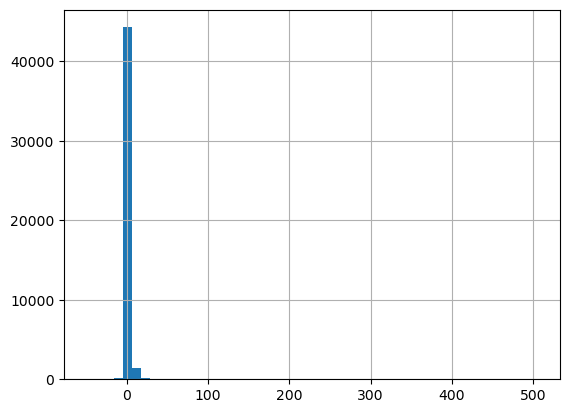

In [73]:
data_score.dropna(subset=['body']).score.hist(bins=50)

<AxesSubplot: >

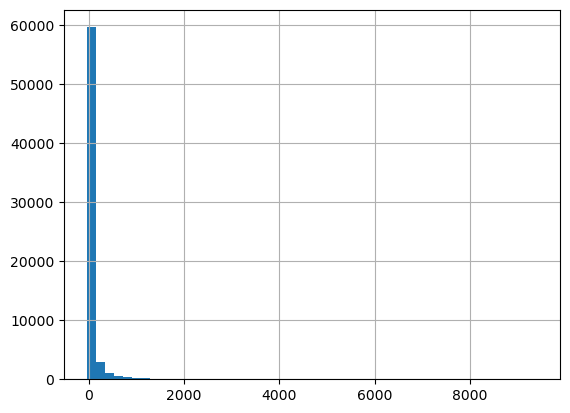

In [74]:
data_score.score.hist(bins=50)

In [75]:
data_score.dropna(subset=['body']).sample(10)

,title,score,id,url,comms_num,created,body,timestamp
8896,Comment,1,i24jlod,NaN,0.0,1.648248e+09,big brain time,2022-03-25 22:47:48
35731,Comment,3,i4f31o0,NaN,0.0,1.649766e+09,Someone said they were arming fuses for the artillery,2022-04-12 12:19:13
13572,Comment,1,i2hxpdn,NaN,0.0,1.648509e+09,I think I missed my mark on the title.,2022-03-28 23:08:03
29673,Comment,1,i3wajl8,NaN,0.0,1.649424e+09,"I say, ""No way, Sergey!""",2022-04-08 13:17:45
6328,Comment,18,i1xa1kq,NaN,0.0,1.648126e+09,Hard Johnson is way better :),2022-03-24 12:48:39
35166,Comment,1,i4fb12g,NaN,0.0,1.649770e+09,Yep Lavrov is a clown.,2022-04-12 13:22:45
7473,Comment,1,i22im4w,NaN,0.0,1.648219e+09,How about Ethiopia?,2022-03-25 14:35:16
7461,Comment,1,i22ip9d,NaN,0.0,1.648219e+09,You know what's the saddest part? Half of the people are still crying over it. Half of the people are still acting like it was the end of the world that areas that Hungary occupied years ago are now back to where they belong. My country is a f\*cking shame.,2022-03-25 14:35:52
2246,Comment,1,i1s9b8r,NaN,0.0,1.648037e+09,"yea, market forces drunk on cheap gas\n\nwhy i support green energy/alternative/nuclear, fuck the dolphins think national security",2022-03-23 12:06:01
62528,Comment,1,i70dmcw,NaN,0.0,1.651486e+09,PMSL......🤣,2022-05-02 10:01:50
